## 4.4 Coding Exercises

In [1]:
import pandas as pd #Importing Pandas
import matplotlib.pyplot as plt #Importing matplotlib
import seaborn as sns #Importing seaborn

In [2]:
best = pd.read_csv('bestsellers.csv') #Importingg bestsellers.csv

In [3]:
#Seeing if there is a not align number 
#like if there is something wrong on the input if it is not 347
best.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         347 non-null    object 
 1   Author       347 non-null    object 
 2   User Rating  347 non-null    float64
 3   Reviews      347 non-null    float64
 4   Price        347 non-null    float64
 5   Year         347 non-null    float64
 6   Genre        347 non-null    object 
 7   Type         347 non-null    object 
dtypes: float64(4), object(4)
memory usage: 23.6+ KB


In [4]:
best.isnull().sum() #knowing the null values. there are 28 null values

Name           28
Author         28
User Rating    28
Reviews        28
Price          28
Year           28
Genre          28
Type           28
dtype: int64

In [5]:
best[best['Name'].isna()] #Seeing the null values if it can be deleted

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#the null values must be deleted because there will be no harm
#on the database if we deleted it.
#isna() before dropna()
#Now we will use the dropna() method to delete the null values
best = best.dropna()
best.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Type           0
dtype: int64

In [7]:
#Delete Type Column
#Because it is a duplicate of Genre Column
#One must go so that it will be efficient
del best['Type']
best.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction
2,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction


#### Questions 
1. Are the number of reviews increasing each year?
*Hint:* Use the groupby() and agg() method to display the table of the total reviews each year.

2. Which book received the most reviews?
*Hint:* Use the sort values to display the top ten books with the most number of reviews.

In [8]:
#Number 1 solution
y_Review = best.groupby('Year', as_index = False).agg({'Reviews':'sum'})
y_Review

,Year,Reviews
0,2009.0,205181.0
1,2010.0,208384.0
2,2011.0,145906.0
3,2012.0,326838.0
4,2013.0,372387.0
5,2014.0,309002.0
6,2015.0,345897.0
7,2016.0,271969.0
8,2017.0,273327.0
9,2018.0,454441.0


<function matplotlib.pyplot.show(close=None, block=None)>

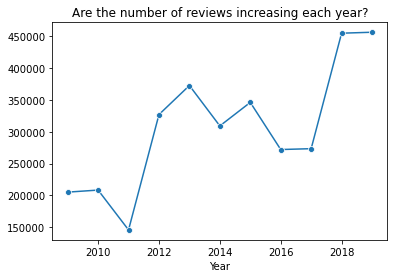

In [16]:
sns.lineplot(x='Year', y='Reviews', data=y_Review, marker='o')
plt.title('Are the number of reviews increasing each year?')
plt.ylabel('')
plt.show

In [9]:
#Number 2 solution
#Sort values by revenue in descending order so top 10 values 
#are at the top of the table
best_Rev = best = best.sort_values(by = 'Reviews', ascending = False).head(10)
best_Rev

,Name,Author,User Rating,Reviews,Price,Year,Genre
366,Where the Crawdads Sing,Delia Owens,4.8,87841.0,15.0,2019.0,Fiction
267,The Girl on the Train,Paula Hawkins,4.1,79446.0,18.0,2015.0,Fiction
36,Becoming,Michelle Obama,4.8,61133.0,11.0,2018.0,Non Fiction
119,Gone Girl,Gillian Flynn,4.0,57271.0,9.0,2014.0,Fiction
262,The Fault in Our Stars,John Green,4.7,50482.0,13.0,2012.0,Fiction
302,The Nightingale: A Novel,Kristin Hannah,4.8,49288.0,11.0,2015.0,Fiction
102,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265.0,14.0,2012.0,Fiction
298,The Martian,Andy Weir,4.7,39459.0,9.0,2015.0,Fiction
23,All the Light We Cannot See,Anthony Doerr,4.6,36348.0,14.0,2014.0,Fiction
241,The Alchemist,Paulo Coelho,4.7,35799.0,39.0,2014.0,Fiction


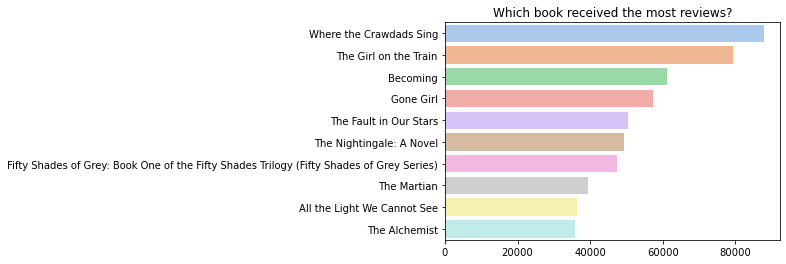

In [20]:
p_top = best_Rev[(best_Rev['Reviews']>=35799.0)]
sns.barplot(y="Name", x="Reviews", data=p_top, ci=False, orient='h', palette = 'pastel')
plt.title('Which book received the most reviews?')
plt.ylabel('')
plt.xlabel('')
plt.show()